### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [188]:
data = pd.read_csv('data/coupons.csv')

In [189]:
#setting the option to see all columns of the dataframe
pd.set_option('display.max_columns', None)
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [190]:
#Examing the data using info(). Understanding data types, columns, number of non-null values per column, missing values.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

Text(0, 0.5, 'Missing Values Count')

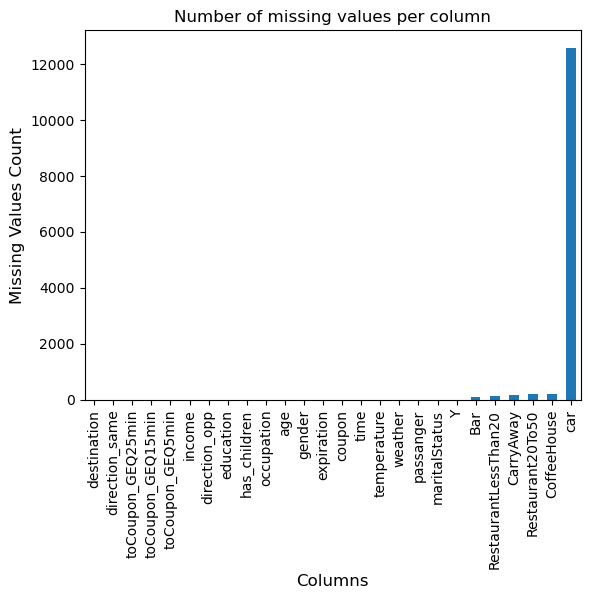

In [192]:
#Visualizing the amount of missing values for each column in the data
data.isnull().sum().sort_values().plot(kind = 'bar')
plt.title('Number of missing values per column')  # title
plt.xlabel('Columns', fontsize=12)  # x-label
plt.ylabel('Missing Values Count', fontsize=12)  # y-label

3. Decide what to do about your missing data -- drop, replace, other...

In [194]:
#More than 99% of data is missing for 'car' column. Deleting the column.
df = data.drop(columns=['car'])

# <2% missing values for the columns - Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, and Restaurant20To50. 
# Replacing these columns with most common values (ie: mode).
for col in ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']:
    df[col].fillna(df[col].mode()[0], inplace=True)

#Re-examining to check missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

C:\Users\sattili\AppData\Local\Temp\ipykernel_21820\1491174673.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [195]:
#Examining the data
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,0


4. What proportion of the total observations chose to accept the coupon?



In [196]:
#Calculating proportion of drivers who chose to accept the coupon, rounding to 2 decimals
proportion = round((df['Y'].sum())/len(df), 2)
print('Proportion of drivers who chose to accept the coupon:', proportion)

Proportion of drivers who chose to accept the coupon: 0.57


5. Use a bar plot to visualize the `coupon` column.

Text(0, 0.5, 'Number of coupons')

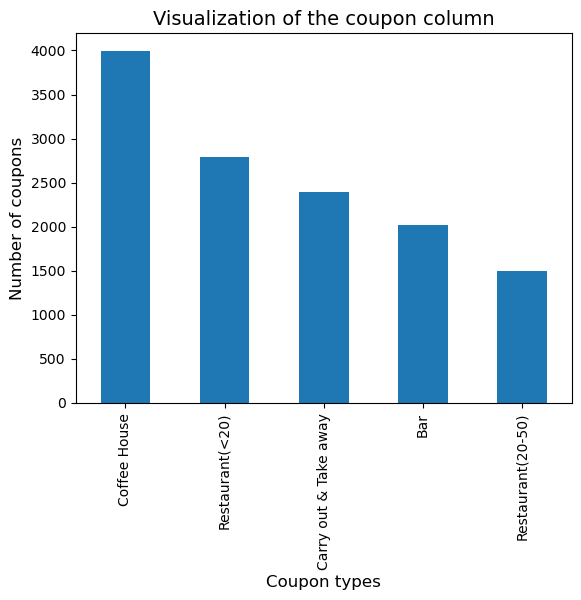

In [198]:
#Bar plot for the column 'coupon' using pandas
df['coupon'].value_counts().plot(kind = 'bar')
plt.title('Visualization of the coupon column', fontsize=14)  # title
plt.xlabel('Coupon types', fontsize=12)  # x-label
plt.ylabel('Number of coupons', fontsize=12)  # y-label

6. Use a histogram to visualize the temperature column.

Text(0, 0.5, 'Number of occurences')

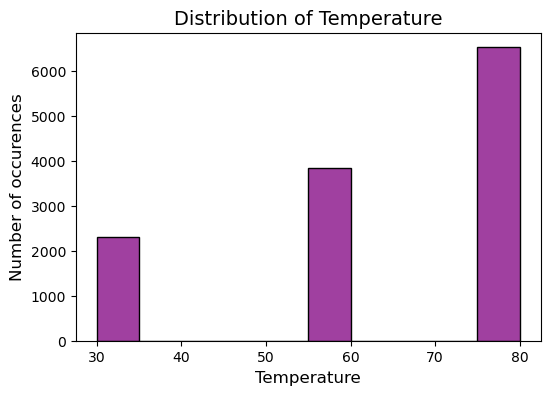

In [200]:
#Histogram for 'temperature' column
# Setting figure size, plotting the histogram using sns and adding the title
plt.figure(figsize=(6, 4))  
sns.histplot(data=df, x='temperature', bins=10, color='purple')
plt.title('Distribution of Temperature', fontsize=14) #title
plt.xlabel('Temperature', fontsize=12)  # x-label
plt.ylabel('Number of occurences', fontsize=12)  # y-label

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [201]:
#Understanding coupon types
df['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar',
       'Restaurant(20-50)'], dtype=object)

In [202]:
#creating a new dataframe that contains only bar coupons
df_bar = df[df['coupon'] == 'Bar'].copy()

#Examining the new data frame
df_bar.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [203]:
#calculating proportion and rounding to 2 decimals
proportion_bar = round((df_bar['Y'].sum())/len(df_bar),2)
proportion_bar

0.41

Text(0, 0.5, 'Quantity')

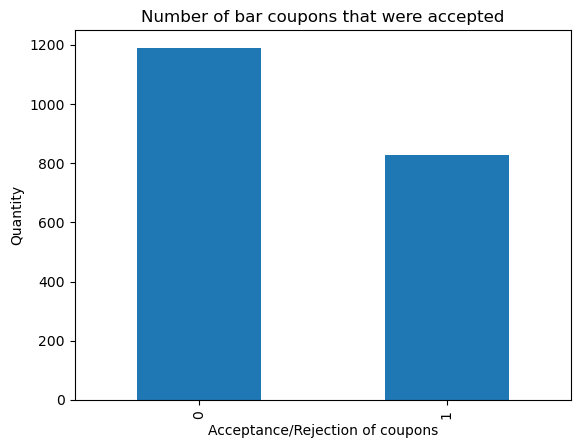

In [206]:
#plotting counts to visualize how many bar coupons were accepted
df_bar['Y'].value_counts().plot(kind = 'bar')

plt.title('Number of bar coupons that were accepted')#title
plt.xlabel('Acceptance/Rejection of coupons')  # x-label
plt.ylabel('Quantity')  # y-label

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

In [207]:
# Defining new categories to create the 2 groups - group 1: Those who went to a bar 3 or fewer times a month, 
# group 2: Those who went to a bar more than 3 times a month
low_freq = ['never', 'less1', '1~3']
high_freq = ['gt8', '4~8']

# Creating a new 'freq' column & assigning values
df_bar['freq'] = ['low' if x in low_freq
                  else 'high' if x in high_freq 
                  else 'other' for x in df_bar['Bar']]

#counting number of rows where freq column values are low and high
low_freq_rows = df_bar[df_bar['freq'] == 'low']
high_freq_rows = df_bar[df_bar['freq'] == 'high']

#calculating acceptance rates for low and high frequencies and rounding to 2 decimals
acceptance_low_freq = round(len(low_freq_rows[low_freq_rows['Y'] == 1]) / len(low_freq_rows),2)
acceptance_high_freq = round(len(high_freq_rows[high_freq_rows['Y'] == 1]) / len(high_freq_rows),2)

#printing results
print('Low freq =', acceptance_low_freq, '\n High freq =', acceptance_high_freq)

Low freq = 0.37 
 High freq = 0.77


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?

In [208]:
#examing all values for 'Bar'
df_bar['Bar'].value_counts()

Bar
never    851
less1    570
1~3      397
4~8      150
gt8       49
Name: count, dtype: int64

In [210]:
## Defining new categories to create the 2 groups - group 1: drivers who go to a bar more than once a month + are over the age of 25, group 2: all others
over_1_freq = ['1~3', '4~8', 'gt8']
over_25 = ['26', '31', '36', '41', '46', '50plus']

# Create '25nfreq' column using np.array. 
df_bar['25nfreq'] = np.where(
    (df_bar['Bar'].isin(over_1_freq)) & (df_bar['age'].isin(over_25)), 'over25highfreq', 'other'
)

#calculating acceptance rates and rounding to 2 decimal points. 
#Since the column 'Y' holds binary values, 0 and 1, mean function can be used to compute the acceptance rates instead of adding all Y=1 values pergroup and dividing by group totals as done earlier 
acceptance_25nfreq_high = round((df_bar[df_bar['25nfreq'] == 'over25highfreq']['Y']).mean(), 2)
acceptance_25nfreq_other = round((df_bar[df_bar['25nfreq'] == 'other']['Y']).mean(), 2)

#Print results
print('Acceptance rates \n')
print('Over 25 and frequent to bar =', acceptance_25nfreq_high)
print('\n')
print('Other =', acceptance_25nfreq_other)

#Is there a difference? - Yes, there is a large difference in the acceptance rates between the two groups - About 70% over 25 and frequent to bar vs 33% in the 'other' category.
print('\n Yes, there is a large difference in the acceptance rates between the two groups - About 70% over 25 and frequent to bar vs 33% in the other category.')

Acceptance rates 

Over 25 and frequent to bar = 0.7


Other = 0.34

 Yes, there is a large difference in the acceptance rates between the two groups - About 70% over 25 and frequent to bar vs 33% in the other category.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [211]:
# Define categories for creating 2 groups - group 1: drivers who go to bars more than once a month and had passengers that 
# were not a kid and had occupations other than farming, fishing, or forestry. Group 2: All others
over_1_freq = ['1~3', '4~8', 'gt8']
not_kid_passenger = ['Alone','Friend(s)','Partner']
not_fff_occupation = [x for x in df_bar['occupation'].unique() if x != 'Farming Fishing & Forestry']  # All except farming

# Create 'bar_pass_occ' column
df_bar['bar_pass_occ'] = np.where(
    (df_bar['Bar'].isin(over_1_freq)) & 
    (df_bar['passanger'].isin(not_kid_passenger)) & 
    (df_bar['occupation'].isin(not_fff_occupation)), 
    'freq_noKid_noFFF', 'other'
)

# Calculate acceptance rates
acceptance_freq_noKid_noFFF = round(df_bar[df_bar['bar_pass_occ'] == 'freq_noKid_noFFF']['Y'].mean(),2)
acceptance_other = round(df_bar[df_bar['bar_pass_occ'] == 'other']['Y'].mean(),2)

# Display results
print('\nAcceptance Rates:')
print('\n Drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry =', acceptance_freq_noKid_noFFF, '\n Others =', acceptance_other)



Acceptance Rates:

 Drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry = 0.71 
 Others = 0.3


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.


In [212]:
# Define categories for creating 2 groups - 
# Group 1: drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
# drivers go to bars more than once a month and are under the age of 30 OR
# go to cheap restaurants more than 4 times a month and income is less than 50K.- This group is the 'target' group
# Group 2: All others

#Define categories
over_1_freq = ['1~3', '4~8', 'gt8']  # Bar visits >1/month
not_kid_passenger = [x for x in df_bar['passanger'].unique() if x != 'Kid(s)']  # Exclude 'Kid(s)'
not_widowed = [x for x in df_bar['maritalStatus'].unique() if x != 'Widowed']  # Exclude 'Widowed'
under_30 = ['below21', '21', '26']  # Age < 30
over_4_restaurant = ['4~8', 'gt8']  # Cheap restaurant >4 times/month
low_income = ['$12500 - $24999', '$25000 - $37499', '$37500 - $49999']  # Income < $50K

# Create 'target_group' column for any of the three conditions specified
df_bar['target_group'] = np.where(
    (
        # Condition 1: Bar>1, passenger != kid, not widowed
        (df_bar['Bar'].isin(over_1_freq)) & 
        (df_bar['passanger'].isin(not_kid_passenger)) & 
        (df_bar['maritalStatus'].isin(not_widowed))
    ) | (
        # Condition 2: Bar>1, age<30
        (df_bar['Bar'].isin(over_1_freq)) & 
        (df_bar['age'].isin(under_30))
    ) | (
        # Condition 3: Cheap restaurant >4/month, income < $50K
        (df_bar['RestaurantLessThan20'].isin(over_4_restaurant)) & 
        (df_bar['income'].isin(low_income))
    ),
    'target', 'other'
)

# Calculate acceptance rates
acceptance_target = round(df_bar[df_bar['target_group'] == 'target']['Y'].mean(), 2)
acceptance_other = round(df_bar[df_bar['target_group'] == 'other']['Y'].mean(), 2)

#print results
print('Acceptance rates')
print('\n Target group meeting any of the specified conditions =', acceptance_target, '\n Others =', acceptance_other)


Acceptance rates

 Target group meeting any of the specified conditions = 0.61 
 Others = 0.3


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Observations
-  41% of bar coupons were accepted.
- Drivers visiting bars more than once a month, especially >3 times, have about 77% acceptance rate, likely due to their regular bar-going habits.
- Drivers with non-kid passengers and non-farming occupations show a 71% acceptance rate, reflecting social, urban lifestyles.
- Frequent bar-goers over 25 have a 70% acceptance rate, showing appeal across young to middle-aged drivers.
- Drivers with income < $50K and like to socialize, or those who have spouse or are single, or those under 30, part of a 61% acceptance rate, accept coupons as deal-seekers.

Below is my hypothesis based on these observations:
Drivers who frequently visit bars, especially those with social, urban lifestyles, non-widowers and from lower incomes, are highly likely to accept Bar coupons due to their regular bar-going habits and deal-seeking behaviors. These targeted segments, spanning young to middle-aged adults, show significantly higher acceptance rates (61%–76%) than others, making them prime candidates for coupon campaigns. Overall, acceptance rate for bar coupons is 41%.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Explorative data analysis of Coffee House coupons

In [213]:
#Exploring coupons for Coffee House:
#creating a new dataframe that contains only coffee house coupons
df_coffee = df[df['coupon'] == 'Coffee House'].copy()

#Examine the data
df_coffee.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0,1,0


In [214]:
#Obtaining the number of rows
len(df_coffee)

3996

In [215]:
#calculating proportion of coffee house coupons accepted overall in this dataframe and rounding to 2 decimals
proportion_coffee = round((df_coffee['Y'].sum())/len(df_coffee),2)
#printing proportion
print(proportion_coffee)

0.5


Analysis of acceptance rates of coffee house coupon based on the time of the day

In [216]:
#getting unique values for time
print("Unique time values:", df_coffee['time'].unique())

Unique time values: ['10AM' '2PM' '6PM' '7AM' '10PM']


In [217]:
#calculate acceptance rates for different times
acceptance_by_time = df_coffee.groupby('time')['Y'].mean()
#understanding numbers per group
acceptance_by_time_counts = df_coffee.groupby('time')['Y'].count()

#print results
print('Acceptance rates per time values and counts:',acceptance_by_time)
print('Total counts',acceptance_by_time_counts)

Acceptance rates per time values and counts: time
10AM    0.640712
10PM    0.424242
2PM     0.547859
6PM     0.412626
7AM     0.445783
Name: Y, dtype: float64
Total counts time
10AM     899
10PM     297
2PM      794
6PM     1093
7AM      913
Name: Y, dtype: int64


Text(0, 0.5, 'Acceptance Rate')

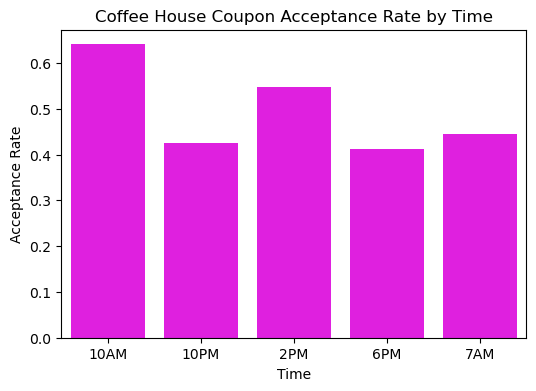

In [218]:
#create a dataframe for acceptance rates by time
df_coffee_acceptancebytime = pd.DataFrame(acceptance_by_time.reset_index())
df_coffee_acceptancebytime.columns = ['time', 'acceptance_rate']

#get counts for each time
df_acceptance_by_time_counts = pd.DataFrame(acceptance_by_time_counts.reset_index())
df_acceptance_by_time_counts.columns = ['time', 'counts']

#Merge the two dataframes using left join
df_coffee_acceptancebytime = pd.merge(
    df_coffee_acceptancebytime,
    df_acceptance_by_time_counts,
    on='time',
    how='left'
)

#Visualizing Coffee House Coupon Acceptance Rate by time
plt.figure(figsize=(6, 4))
sns.barplot(x='time', y='acceptance_rate', data=df_coffee_acceptancebytime, color='magenta')
plt.title('Coffee House Coupon Acceptance Rate by Time')
plt.xlabel('Time')
plt.ylabel('Acceptance Rate')

Analysis of acceptance rates of coffee house coupon based gender

In [219]:
#examining coffee house coupon acceptance rates between genders
#examining the gender specific counts
df_coffee['gender'].value_counts()

#Calculating acceptance rates
acceptance_coffee_female = round(df_coffee[df_coffee['gender'] == 'Female']['Y'].mean(),2)
acceptance_coffee_male = round(df_coffee[df_coffee['gender'] == 'Male']['Y'].mean(),2)

#Print results
print('Acceptance rates where gender = female is', acceptance_coffee_female)
print('Acceptance rates where gender = male is', acceptance_coffee_male)

Acceptance rates where gender = female is 0.49
Acceptance rates where gender = male is 0.51


Analysis of acceptance rates of coffee house coupon based on direction wrt venue - same direction or opposite direction

In [220]:
#Examining acceptance rate when direction is the same as venue to understand any patterns
#Calculating acceptance rates
acceptance_coffee_samedir = round(df_coffee[df_coffee['direction_same'] == 1]['Y'].mean(),2)

#print results rounded to 2 decimals
print('Acceptance rates for same direction:', acceptance_coffee_samedir)

Acceptance rates for same direction: 0.53


In [221]:
#Examining acceptance rate when direction is the opposite to venue to understand any patterns
#Calculating acceptance rates
acceptance_coffee_oppdir = round(df_coffee[df_coffee['direction_opp'] == 1]['Y'].mean(),2)

#print results rounded to 2 decimals
print('Acceptance rates for opposite direction:', acceptance_coffee_oppdir)

Acceptance rates for opposite direction: 0.49


Analysis of acceptance rates of coffee house coupon based employement status

In [222]:
#Examining acceptance rates for employed vs all other types
#defining catergories to create the 2 groups - unemployed vs employed

not_unemployed = [x for x in df_coffee['occupation'].unique() if x != 'Unemployed']  # All except unemployed

# Create 'coffee_job' column
df_coffee['coffee_job'] = np.where(
    df_coffee['occupation'].isin(not_unemployed), 
    'Employed', 'Unemployed'
)

# Calculate acceptance rates
acceptance_employed = round(df_coffee[df_coffee['coffee_job'] == 'Employed']['Y'].mean(),2)
acceptance_unemployed = round(df_coffee[df_coffee['coffee_job'] == 'Unemployed']['Y'].mean(),2)

# Display results
print('\nAcceptance Rates of drivers who are:')
print('\n Employed =', acceptance_employed, '\n Unemployed =', acceptance_unemployed)


Acceptance Rates of drivers who are:

 Employed = 0.49 
 Unemployed = 0.54


Analysis of acceptance rates of coffee house coupon based on age

In [223]:
#getting unique values for age
print("Unique age values:", df_coffee['age'].unique())

Unique age values: ['21' '46' '26' '31' '41' '50plus' '36' 'below21']


In [224]:
#analyzing acceptance rates for different age groups
acceptance_by_age = df_coffee.groupby('age')['Y'].mean()
#understanding numbers per group
acceptance_by_age_counts = df_coffee.groupby('age')['Y'].count()

#print results
print('Acceptance rates per age values and counts:',acceptance_by_age)
print('Total counts',acceptance_by_age_counts)

Acceptance rates per age values and counts: age
21         0.524349
26         0.514828
31         0.476726
36         0.467662
41         0.501538
46         0.513636
50plus     0.420183
below21    0.696774
Name: Y, dtype: float64
Total counts age
21         883
26         843
31         623
36         402
41         325
46         220
50plus     545
below21    155
Name: Y, dtype: int64


Text(0, 0.5, 'Acceptance Rate')

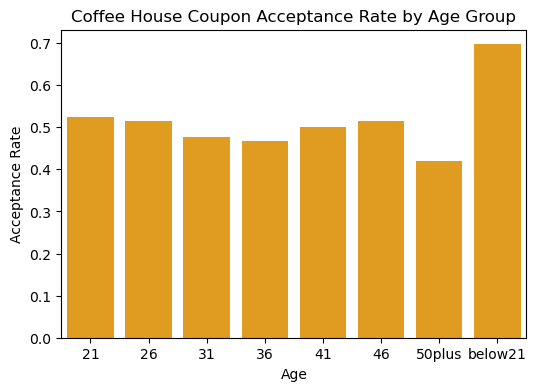

In [225]:
#create a dataframe for acceptance rates by age
df_coffee_acceptancebyage = pd.DataFrame(acceptance_by_age.reset_index())
df_coffee_acceptancebyage.columns = ['age', 'acceptance_rate']

#get counts for each age
df_acceptance_by_age_counts = pd.DataFrame(acceptance_by_age_counts.reset_index())
df_acceptance_by_age_counts.columns = ['age', 'counts']

#Merge the two dataframes using left join
df_coffee_acceptancebyage = pd.merge(
    df_coffee_acceptancebyage,
    df_acceptance_by_age_counts,
    on='age',
    how='left'
)

#Visualizing Coffee House Coupon Acceptance Rate by Age Group
plt.figure(figsize=(6, 4))
sns.barplot(x='age', y='acceptance_rate', data=df_coffee_acceptancebyage, color='orange')
plt.title('Coffee House Coupon Acceptance Rate by Age Group')
plt.xlabel('Age')
plt.ylabel('Acceptance Rate')

Analysis of acceptance rates of coffee house coupon based on only passanger type

In [226]:
#getting unique values for passanger
print("Unique age values:", df_coffee['passanger'].unique())

Unique age values: ['Friend(s)' 'Kid(s)' 'Alone' 'Partner']


In [227]:
#analyzing acceptance rates for different passanger types
acceptance_by_pass = df_coffee.groupby('passanger')['Y'].mean()
#understanding numbers per group
acceptance_by_pass_counts = df_coffee.groupby('passanger')['Y'].count()

#print results
print('Acceptance rates per passanger type and counts:',acceptance_by_pass)
print('Total counts',acceptance_by_pass_counts)

Acceptance rates per passanger type and counts: passanger
Alone        0.437943
Friend(s)    0.596906
Kid(s)       0.483092
Partner      0.570492
Name: Y, dtype: float64
Total counts passanger
Alone        2256
Friend(s)    1228
Kid(s)        207
Partner       305
Name: Y, dtype: int64


Text(0, 0.5, 'Acceptance Rate')

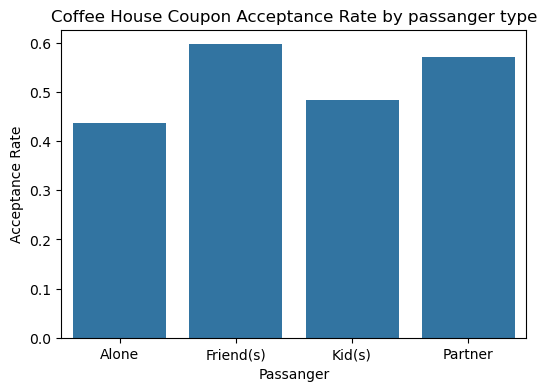

In [228]:
#create a dataframe for acceptance rates by passanger
df_coffee_acceptancebypass = pd.DataFrame(acceptance_by_pass.reset_index())
df_coffee_acceptancebypass.columns = ['passanger', 'acceptance_rate']

#get counts for each passanger type
df_acceptance_by_pass_counts = pd.DataFrame(acceptance_by_pass_counts.reset_index())
df_acceptance_by_pass_counts.columns = ['passanger', 'counts']

#Merge the two dataframes using left join
df_coffee_acceptancebypass = pd.merge(
    df_coffee_acceptancebypass,
    df_acceptance_by_pass_counts,
    on='passanger',
    how='left'
)

#Visualizing Coffee House Coupon Acceptance Rate by Age Group
plt.figure(figsize=(6, 4))
sns.barplot(x='passanger', y='acceptance_rate', data=df_coffee_acceptancebypass)
plt.title('Coffee House Coupon Acceptance Rate by passanger type')
plt.xlabel('Passanger')
plt.ylabel('Acceptance Rate')

Analyzing the effect of weather and passanger type for coffee house coupon acceptance rates

In [229]:
#Understanding unique values for weather
print("Unique weather values:", df_coffee['weather'].unique())

Unique weather values: ['Sunny' 'Rainy' 'Snowy']


In [230]:
# Defining new categories to create the 2 groups - group 1: weather is sunny and passanger is a friend, 
# group 2: all others
# Creating a new 'sunnyfriend' column & assigning values
goodweather = ['Sunny']

# Creating a new 'sunnyfriend' column & assigning values
df_coffee['sunnyfriend'] = np.where(
    (df_coffee['weather'].isin(goodweather)) &
    (df_coffee['passanger'].isin(pas)),
     'ideal', 'other'
    )

#calculating acceptance rates
ideal_acceptance = round(df_coffee[df_coffee['sunnyfriend'] == 'ideal']['Y'].mean(), 2)
other_acceptance = round(df_coffee[df_coffee['sunnyfriend'] == 'other']['Y'].mean(), 2)
print ('Acceptance rates between 2 groups. Group 1: weather is sunny and passanger is a friend. Group 2: all others')
print ('Group 1:', ideal_acceptance)
print ('Group 2:', other_acceptance)

Acceptance rates between 2 groups. Group 1: weather is sunny and passanger is a friend. Group 2: all others
Group 1: 0.6
Group 2: 0.46


Analysis of coffee house coupon acceptance rate based on education level

In [231]:
#analyzing acceptance rates for different education levels
acceptance_by_edlvl = df_coffee.groupby('education')['Y'].mean()
#understanding numbers per group
acceptance_by_edlvl_counts = df_coffee.groupby('education')['Y'].count()

#print results
print('Acceptance rates by education levels and counts:',acceptance_by_edlvl)
print('Total counts',acceptance_by_edlvl_counts)

Acceptance rates by education levels and counts: education
Associates degree                         0.517143
Bachelors degree                          0.462774
Graduate degree (Masters or Doctorate)    0.510033
High School Graduate                      0.541219
Some High School                          0.607143
Some college - no degree                  0.515682
Name: Y, dtype: float64
Total counts education
Associates degree                          350
Bachelors degree                          1370
Graduate degree (Masters or Doctorate)     598
High School Graduate                       279
Some High School                            28
Some college - no degree                  1371
Name: Y, dtype: int64


In [232]:
#create a dataframe for acceptance rates by education
df_acceptance_by_edlvl = pd.DataFrame(acceptance_by_edlvl.reset_index())
df_acceptance_by_edlvl.columns = ['education', 'acceptance_rate']

#get counts for each passanger type and create a dataframe for the data
df_acceptance_by_edlvl_counts = pd.DataFrame(acceptance_by_edlvl_counts.reset_index())
df_acceptance_by_edlvl_counts.columns = ['education', 'counts']

#examining the data
df_acceptance_by_edlvl
#df_acceptance_by_edlvl_counts

,education,acceptance_rate
0,Associates degree,0.517143
1,Bachelors degree,0.462774
2,Graduate degree (Masters or Doctorate),0.510033
3,High School Graduate,0.541219
4,Some High School,0.607143
5,Some college - no degree,0.515682


In [233]:
#Merge the two dataframes using left join
df_acceptance_by_edlvl = pd.merge(
    df_acceptance_by_edlvl,
    df_acceptance_by_edlvl_counts,
    on='education',
    how='left'
)
#Examine merged dataframe
df_acceptance_by_edlvl

,education,acceptance_rate,counts
0,Associates degree,0.517143,350
1,Bachelors degree,0.462774,1370
2,Graduate degree (Masters or Doctorate),0.510033,598
3,High School Graduate,0.541219,279
4,Some High School,0.607143,28
5,Some college - no degree,0.515682,1371


Text(0.5, 0, 'Acceptance Rate')

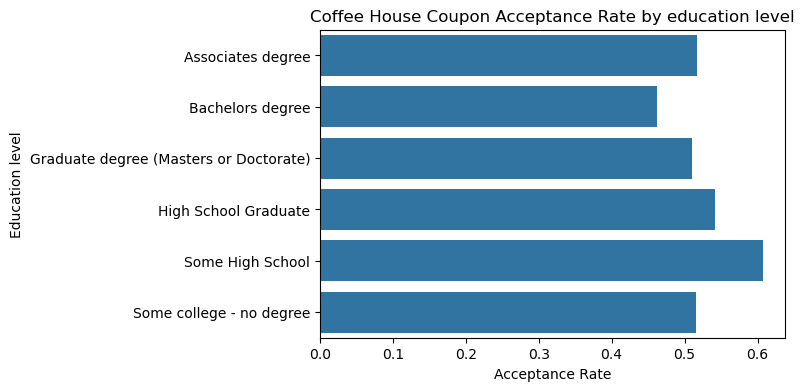

In [234]:
#Visualizing Coffee House Coupon Acceptance Rate by Edu lvls
plt.figure(figsize=(6, 4))
sns.barplot(x='acceptance_rate', y='education', data=df_acceptance_by_edlvl)
plt.title('Coffee House Coupon Acceptance Rate by education level')
plt.ylabel('Education level')
plt.xlabel('Acceptance Rate')

Analysis of acceptance rates of coffee house coupon based on income levels

In [235]:
#analyzing acceptance rates for income levels
acceptance_by_income = df_coffee.groupby('income')['Y'].mean()
#understanding numbers per group
acceptance_by_income_counts = df_coffee.groupby('income')['Y'].count()

#print results
print('Acceptance rates by income levels and counts:',acceptance_by_income)
print('Total counts',acceptance_by_income_counts)

Acceptance rates by income levels and counts: income
$100000 or More     0.494382
$12500 - $24999     0.540404
$25000 - $37499     0.473438
$37500 - $49999     0.542373
$50000 - $62499     0.503650
$62500 - $74999     0.436364
$75000 - $87499     0.296610
$87500 - $99999     0.557196
Less than $12500    0.551948
Name: Y, dtype: float64
Total counts income
$100000 or More     534
$12500 - $24999     594
$25000 - $37499     640
$37500 - $49999     590
$50000 - $62499     548
$62500 - $74999     275
$75000 - $87499     236
$87500 - $99999     271
Less than $12500    308
Name: Y, dtype: int64


In [236]:
#create a dataframe for acceptance rates by education
df_acceptance_by_income = pd.DataFrame(acceptance_by_income.reset_index())
df_acceptance_by_income.columns = ['income', 'acceptance_rate']

#get counts for each passanger type and create a dataframe for the data
df_acceptance_by_income_counts = pd.DataFrame(acceptance_by_income_counts.reset_index())
df_acceptance_by_income_counts.columns = ['income', 'counts']

#examining the data
df_acceptance_by_income
#df_acceptance_by_income_counts.head()

,income,acceptance_rate
0,$100000 or More,0.494382
1,$12500 - $24999,0.540404
2,$25000 - $37499,0.473438
3,$37500 - $49999,0.542373
4,$50000 - $62499,0.503650
5,$62500 - $74999,0.436364
6,$75000 - $87499,0.296610
7,$87500 - $99999,0.557196
8,Less than $12500,0.551948


In [237]:
#Merge the two dataframes using left join
df_acceptance_by_income = pd.merge(
    df_acceptance_by_income,
    df_acceptance_by_income_counts,
    on='income',
    how='left'
)

In [238]:
#Examine merged dataframe
df_acceptance_by_income

,income,acceptance_rate,counts
0,$100000 or More,0.494382,534
1,$12500 - $24999,0.540404,594
2,$25000 - $37499,0.473438,640
3,$37500 - $49999,0.542373,590
4,$50000 - $62499,0.503650,548
5,$62500 - $74999,0.436364,275
6,$75000 - $87499,0.296610,236
7,$87500 - $99999,0.557196,271
8,Less than $12500,0.551948,308


Text(0.5, 0, 'Acceptance Rate')

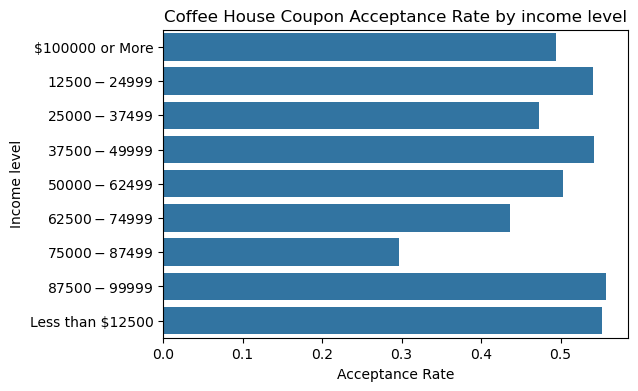

In [239]:
#Visualizing Coffee House Coupon Acceptance Rate by Edu lvls
plt.figure(figsize=(6, 4))
sns.barplot(x='acceptance_rate', y='income', data=df_acceptance_by_income)
plt.title('Coffee House Coupon Acceptance Rate by income level')
plt.ylabel('Income level')
plt.xlabel('Acceptance Rate')

Comparing acceptance rates between the three columns to analyze if travel time to coupon location is a factor - toCoupon_GEQ5min, toCoupon_GEQ15min, toCoupon_GEQ25min

0.5 0.45 0.35


Text(0, 0.5, 'Acceptance Rate')

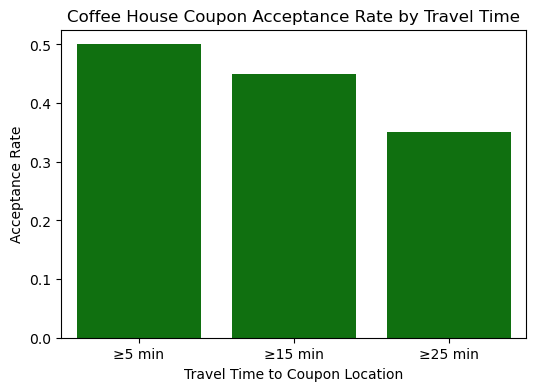

In [241]:
#calculating proportion of coffee house coupons accepted when driver is GEQ 5 min and rounding to 2 decimals
acceptance_coffee_5min = round(df_coffee[df_coffee['toCoupon_GEQ5min']==1]['Y'].mean(),2)
acceptance_coffee_15min = round(df_coffee[df_coffee['toCoupon_GEQ15min']==1]['Y'].mean(),2)
acceptance_coffee_25min = round(df_coffee[df_coffee['toCoupon_GEQ25min']==1]['Y'].mean(),2)

print(acceptance_coffee_5min, acceptance_coffee_15min, acceptance_coffee_25min)

# Create DataFrame for plotting
trvltime_data = pd.DataFrame({
    'travel_time': ['≥5 min', '≥15 min', '≥25 min'],
    'acceptance_rate': [acceptance_coffee_5min, acceptance_coffee_15min, acceptance_coffee_25min]    
})

# Plotting the data
plt.figure(figsize=(6, 4))
sns.barplot(x='travel_time', y='acceptance_rate', data=trvltime_data, color='green')
plt.title('Coffee House Coupon Acceptance Rate by Travel Time')
plt.xlabel('Travel Time to Coupon Location')
plt.ylabel('Acceptance Rate')



Observations:
Total acceptance rates are 50% for coffee coupons.
Acceptance rates are highest (64%) at 10 am.
Similar acceptance rates between men and women (51% vs 49%)
Acceptance rates for same direction were 53% vs 49% if venue is in the opposite direction.
High acceptance rate of 60% when passanger is a friend/s and when weather is sunny and passanger is a friend(s).
Acceptance rates seem to go down after 50 years of age.
Younger people below 21 years seem to have the highest acceptance rates (close to 70%) but the number of people under 21 are lower compared to other age groups.
As expected, the acceptance rates were slightly higher - 54% in unemployed populations compared to employed people - 49%.
Education levels did not much of a difference with respect to acceptance rates. The 'some high school' group showed a higher rate but upon investigation, it was noted that the subset has significantly low data points.
The income level between 75000 and 87499 showed the lowest acceptance rate of 30% compared to all other income levels.
Acceptance rates decreased as travel time increased.

Hypothesis:
Based on the observations, I hypothesize that younger individuals (below 21) and unemployed populations exhibit higher coffee house coupon acceptance rates, particularly in social settings like sunny weather with friends or at peak morning times (e.g., 10 AM), due to greater social motivation and time availability. People tended to accept the coupon if they are closer to the coupon location, there seems to be an inverse relation between the travel time and acceptance rate as expected. The low acceptance rate (30%) for the $75,000–$87,499 income group may reflect reduced perceived value of coupons among mid-income professionals with less flexible schedules or preferences for alternative venues. Additionally, while gender and education level have minimal impact, the higher rate for the 'some high school' group is likely unreliable due to small sample sizes. Acceptance rates also appear influenced by convenience, with same-direction venues slightly preferred, and decline after age 50, possibly due to differing lifestyle priorities. Overall acceptance rates are 50% for the coffee coupons.